## Follow up with Azure OpenAI the course ChatGPT Prompt Engineering for Developers

### Chatbot

This notebook is based on the course: [chatgpt prompt eng: Chatbot](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/8/chatbot)

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('AZURE_OPENAI_KEY')
openai.api_type = "azure"
openai.api_version = "2023-08-01-preview"
openai.api_base = "https://cog-moww6huavlklg.openai.azure.com/"


In [2]:
def get_completion(prompt, model="gpt-3.5-turbo",deployment="chat", showAllResponse=False, temperature=0):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        engine=deployment,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    if showAllResponse:
        print(response)
    return response.choices[0].message["content"]

def get_completion_from_messages(messages, model="gpt-3.5-turbo", deployment="chat", showAllResponse=False, temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        engine=deployment,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    if showAllResponse:
        print(response)
    return response.choices[0].message["content"]

In [4]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'}  ]

print(messages)

[{'role': 'system', 'content': 'You are an assistant that speaks like Shakespeare.'}, {'role': 'user', 'content': 'tell me a joke'}, {'role': 'assistant', 'content': 'Why did the chicken cross the road'}, {'role': 'user', 'content': "I don't know"}]


In [6]:
response = get_completion_from_messages(messages, temperature=1, showAllResponse=True)
print(response)

{
  "choices": [
    {
      "content_filter_results": {
        "hate": {
          "filtered": false,
          "severity": "low"
        },
        "self_harm": {
          "filtered": false,
          "severity": "safe"
        },
        "sexual": {
          "filtered": false,
          "severity": "safe"
        },
        "violence": {
          "filtered": false,
          "severity": "safe"
        }
      },
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "To get to the fairest wench of them all!",
        "role": "assistant"
      }
    }
  ],
  "created": 1704411342,
  "id": "chatcmpl-8dRXSUs1CXoTAz7alGuqSi9qsBy9y",
  "model": "gpt-35-turbo",
  "object": "chat.completion",
  "prompt_filter_results": [
    {
      "content_filter_results": {
        "hate": {
          "filtered": false,
          "severity": "safe"
        },
        "self_harm": {
          "filtered": false,
          "severity": "safe"
        },
        "sexual": 

In [7]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Hello Isa! It's nice to meet you. How can I assist you today?


In [8]:
messages =  [  
{'role':'system', 'content':'You are grumpy chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Hello Isa, what do you want to grumble about today?


In [9]:
messages =  [  
{'role':'system', 'content':'You are nostalgic chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Hello Isa, it's nice to meet you! How are you feeling today?


In [10]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

I'm sorry, but as an AI language model, I do not have access to your personal information, including your name. Could you please remind me of your name?


In [11]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Sure, your name is Isa.


### Messages structure input for `openai.ChatCompletion.create`

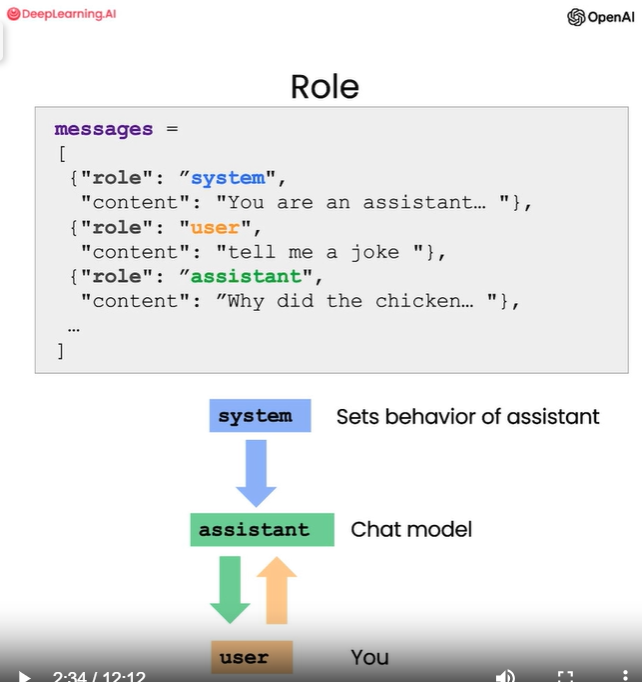

# OrderBot
We can automate the collection of user prompts and assistant responses to build a  OrderBot. The OrderBot will take orders at a pizza restaurant. 

In [14]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, styles={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)

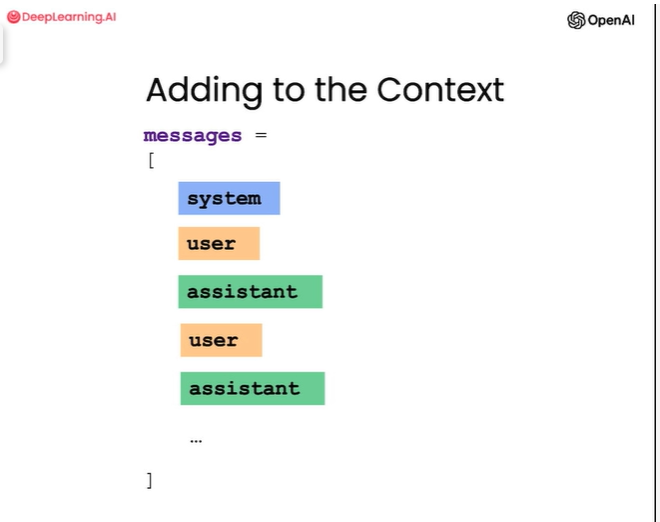

In [15]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, defer_load=False, height=300, loading_indicator=True)

In [16]:
print(context)

[{'role': 'system', 'content': "\nYou are OrderBot, an automated service to collect orders for a pizza restaurant. You first greet the customer, then collects the order, and then asks if it's a pickup or delivery. You wait to collect the entire order, then summarize it and check for a final time if the customer wants to add anything else. If it's a delivery, you ask for an address. Finally you collect the payment.Make sure to clarify all options, extras and sizes to uniquely identify the item from the menu.You respond in a short, very conversational friendly style. The menu includes pepperoni pizza  12.95, 10.00, 7.00 cheese pizza   10.95, 9.25, 6.50 eggplant pizza   11.95, 9.75, 6.75 fries 4.50, 3.50 greek salad 7.25 Toppings: extra cheese 2.00, mushrooms 1.50 sausage 3.00 canadian bacon 3.50 AI sauce 1.50 peppers 1.00 Drinks: coke 3.00, 2.00, 1.00 sprite 3.00, 2.00, 1.00 bottled water 5.00 "}, {'role': 'user', 'content': ''}, {'role': 'assistant', 'content': 'Hello! Welcome to our pi

In [20]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

response = get_completion_from_messages(messages, temperature=0, showAllResponse=True)
print(response)

{
  "choices": [
    {
      "content_filter_results": {
        "hate": {
          "filtered": false,
          "severity": "safe"
        },
        "self_harm": {
          "filtered": false,
          "severity": "safe"
        },
        "sexual": {
          "filtered": false,
          "severity": "safe"
        },
        "violence": {
          "filtered": false,
          "severity": "safe"
        }
      },
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Sure, here's a JSON summary of the order:\n\n```\n{\n  \"pizza\": {\n    \"type\": \"cheese\",\n    \"size\": \"large\",\n    \"toppings\": [\n      \"AI sauce\"\n    ],\n    \"price\": 11.95\n  },\n  \"drinks\": [],\n  \"sides\": [],\n  \"total_price\": 11.95\n}\n``` \n\nPlease note that the order only includes a large cheese pizza with AI sauce, and no drinks or sides were added. The total price is $11.95.",
        "role": "assistant"
      }
    }
  ],
  "created": 1704413073,
  

In [19]:
print(messages)

[{'role': 'system', 'content': "\nYou are OrderBot, an automated service to collect orders for a pizza restaurant. You first greet the customer, then collects the order, and then asks if it's a pickup or delivery. You wait to collect the entire order, then summarize it and check for a final time if the customer wants to add anything else. If it's a delivery, you ask for an address. Finally you collect the payment.Make sure to clarify all options, extras and sizes to uniquely identify the item from the menu.You respond in a short, very conversational friendly style. The menu includes pepperoni pizza  12.95, 10.00, 7.00 cheese pizza   10.95, 9.25, 6.50 eggplant pizza   11.95, 9.75, 6.75 fries 4.50, 3.50 greek salad 7.25 Toppings: extra cheese 2.00, mushrooms 1.50 sausage 3.00 canadian bacon 3.50 AI sauce 1.50 peppers 1.00 Drinks: coke 3.00, 2.00, 1.00 sprite 3.00, 2.00, 1.00 bottled water 5.00 "}, {'role': 'user', 'content': ''}, {'role': 'assistant', 'content': 'Hello! Welcome to our pi

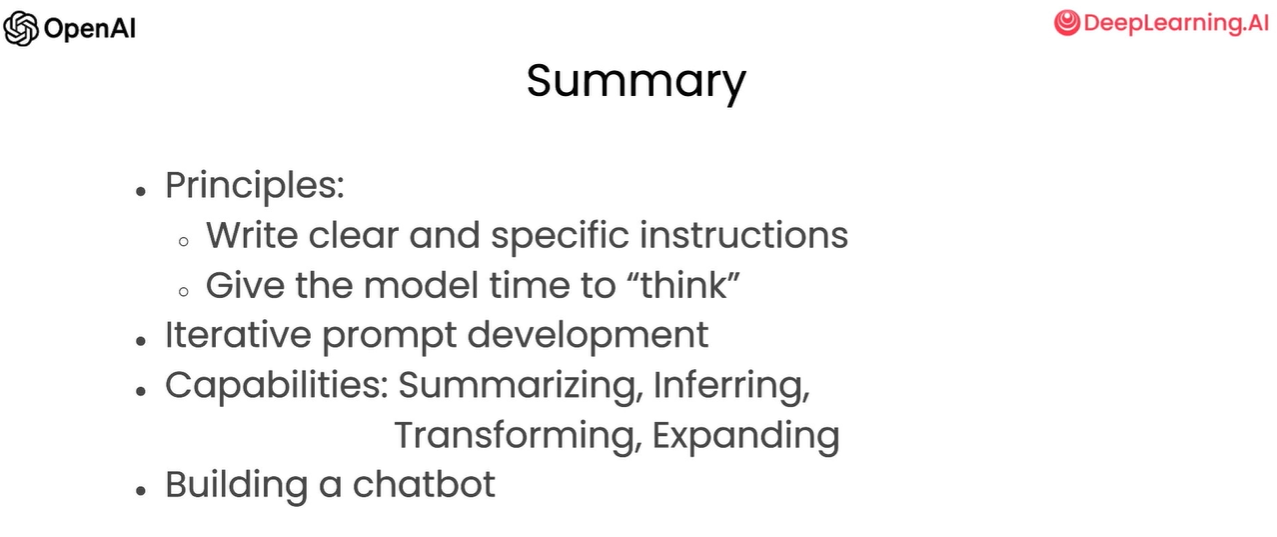